# Home Prices Linear Regression Single Variable

In [ ]:
# Given home prices dataset, create a model that predicts home price based on area. Then predict the home price whose area is 3300 sqft and 5000 sqft

In [2]:
import pandas as pd 
import polars as pl 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [27]:
df = pl.read_csv('homeprices.csv')
df 

area,price
i64,i64
2600,550000
3000,565000
3200,610000
3600,680000
4000,725000


Text(0, 0.5, 'Price (US$)')

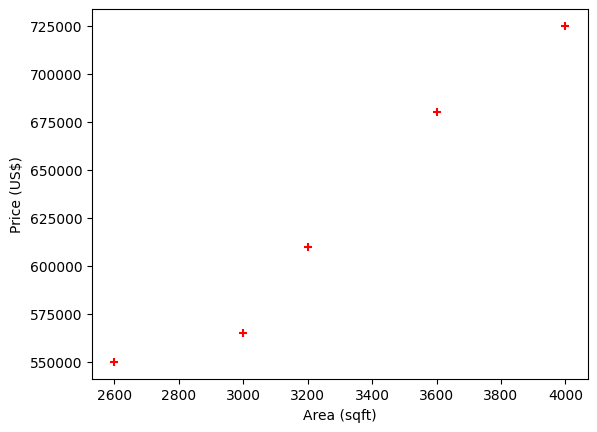

In [28]:
%matplotlib inline 
plt.scatter(df['area'], df['price'], color = 'red', marker='+')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (US$)')

In [29]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price'])

LinearRegression()

In [30]:
reg.predict([[3300]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [31]:
reg.coef_

array([135.78767123])

In [32]:
reg.intercept_

np.float64(180616.43835616432)

In [33]:
# y = mx + b
135.78767123*3300 + 180616.43835616432

628715.7534151643

In [34]:
reg.predict([[5000]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [35]:
135.78767123*5000 + 180616.43835616432

859554.7945061643

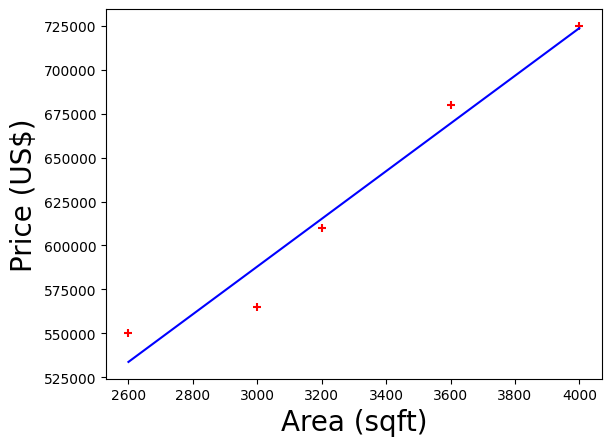

In [41]:
%matplotlib inline 
plt.scatter(df['area'], df['price'], color = 'red', marker='+')
plt.xlabel('Area (sqft)', fontsize=20)
plt.ylabel('Price (US$)', fontsize=20)
plt.plot(df['area'], reg.predict(df[['area']]), color = 'blue')

## Predicting Several Values

In [17]:
d = pl.read_csv('areas.csv')
d

area
i64
1000
1500
2300
3540
4120
…
4750
2300
9000


In [19]:
p = reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [21]:
d = d.with_columns([
    p
])

In [22]:
d

area,literal
i64,f64
1000,316404.109589
1500,384297.945205
2300,492928.082192
3540,661304.794521
4120,740061.643836
…,…
4750,825607.876712
2300,492928.082192
9000,1.4027e6


In [25]:
d.write_csv('prediction.csv')

Predict per capita income for 2020

In [42]:
import polars as pl 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model 


In [43]:
df = pl.read_csv('canada_per_capita_income.csv')
df

year,per capita income (US$)
i64,f64
1970,3399.299037
1971,3768.297935
1972,4251.175484
1973,4804.463248
1974,5576.514583
…,…
2012,42665.25597
2013,42676.46837
2014,41039.8936


In [49]:
X = df[['year']]

In [50]:
y = df['per capita income (US$)']

In [51]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [52]:
model.intercept_

np.float64(-1632210.7578554575)

In [53]:
model.coef_

array([828.46507522])

In [58]:
model.predict([[2020]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

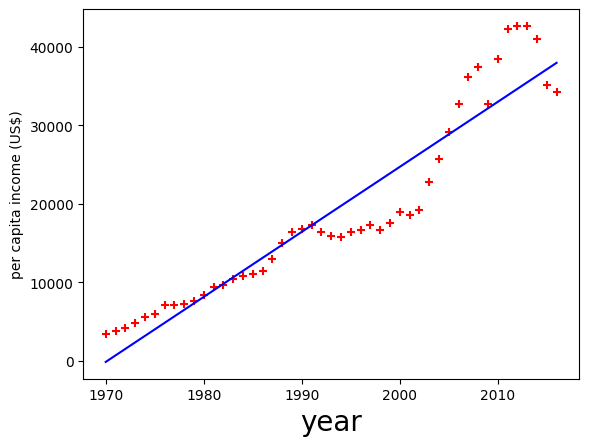

In [64]:
%matplotlib inline 
plt.scatter(X, y, color = 'red', marker='+')
plt.xlabel('year', fontsize=20)
plt.ylabel('per capita income (US$)')
plt.plot(X, model.predict(df[['year']]), color = 'blue')